In [1]:
# import standard modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 10)

# Topic 3 - Testing a proposed model

## Motivation

We consider a simple empirical relation of the form

$
y = a x + b
$

between the input, $x$, and output, $y$, of an experiment. Here $a$ and $b$ are parameters that characterise the model. Suppose that results of the experiment, $y_{1}, \dots, y_{n}$ have been determined for the inputs $x_{1},\dots, x_{n}$. Our 
aim is to determine whether a proposed model, $(a,b)$,  could have
produced the observed data.  In discussing this problem, we will assume that the values of 
the $x_{i}$ are known precisely, but that the $y_{i}$ are subject to random errors drawn from a known
distribution. Errors on both $x$ and $y$ can be handled, but at the cost of slightly more 
elaborate methods. 

The code below produces a synthetic data set that we can work with. For the plot we use:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

to show both values and the associated uncertainties.

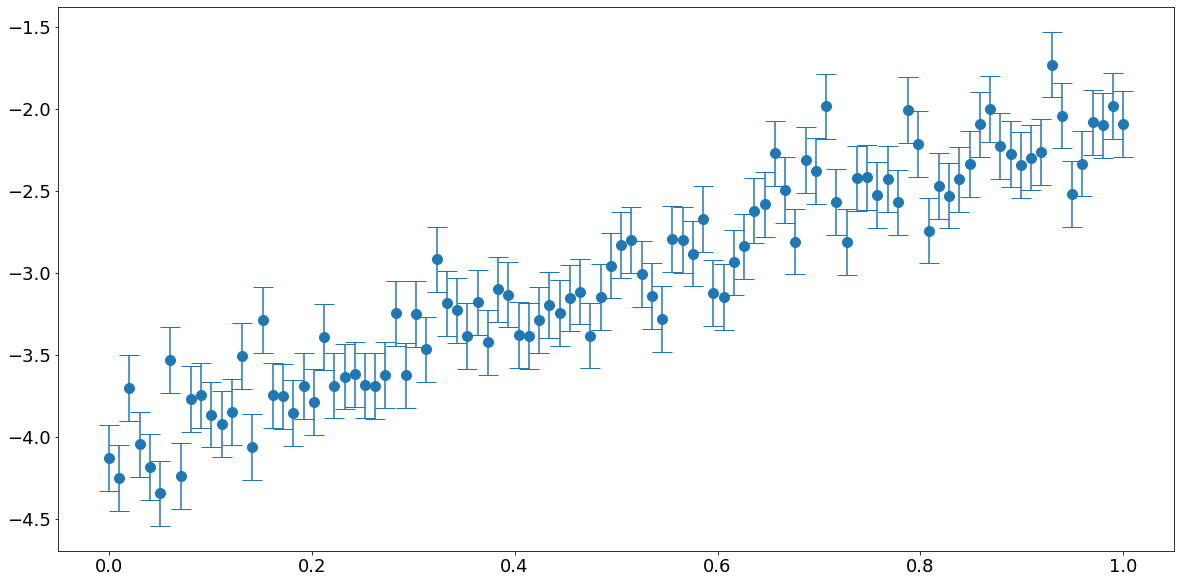

In [2]:
# Set the number of data
n = 100

# Set the true values for the parameters
a =  2
b = -4

# Set the values of x
x = np.linspace(0,1,n)

# Set the error distribution
sigma = 0.2
Z = stats.norm(scale = sigma)

# Get the values of y
y = a*x + b + Z.rvs(n)

# Plot the data
plt.errorbar(x,y,yerr=sigma,linestyle='none',marker='o',markersize = 10,capsize = 10)
plt.show()

## Visual inspection

Having generated our data, we forget that we know how it was generated. Instead, suppose that the following model has been proposed: $(a,b) = (2.5,-4.25)$. The first step in assessing the model is simply to plot its predictions against the data. 

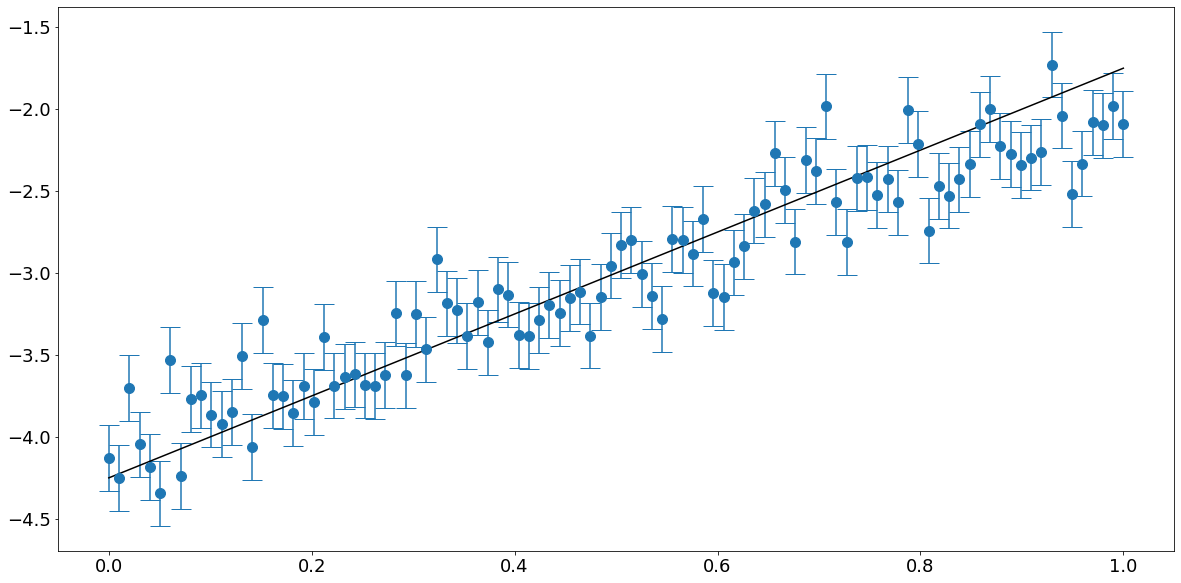

In [3]:
# Set the proposed model values
a = 2.5
b = -4.25

## Compute values for plotting the model
xx = np.linspace(0,1,100)
yy = a*xx+b

# Make the plot
plt.errorbar(x,y,yerr=sigma,linestyle='none',marker='o',markersize = 10,capsize = 10)
plt.plot(xx,yy,'k')
plt.show()

Looking at the comparison, we may or may not be inclined to accept this model. But we can probably agree that:
1. None of the data values seem obviously suspect
2. The form of the assumed model (i.e. a straight line) is probably is reasonable. 

Having conducted this basic check, we can continue move onto more quantitative methods. If we assume that the proposed model is correct, we can then write the **normalised residuals** as

$
\bar{z}_{i} = \frac{ y_{i} - a x_{i} - b}{\sigma}, 
$

with these values being, by assumption, samples drawn from a standard normal distribution. In this 
manner, our problem is reduced to a standard form:
**is it plausible that observed numbers have been sampled from an assumed distribution?** 

To proceed, we first plot a histogram of the normalised residuals along with their putative PDF:

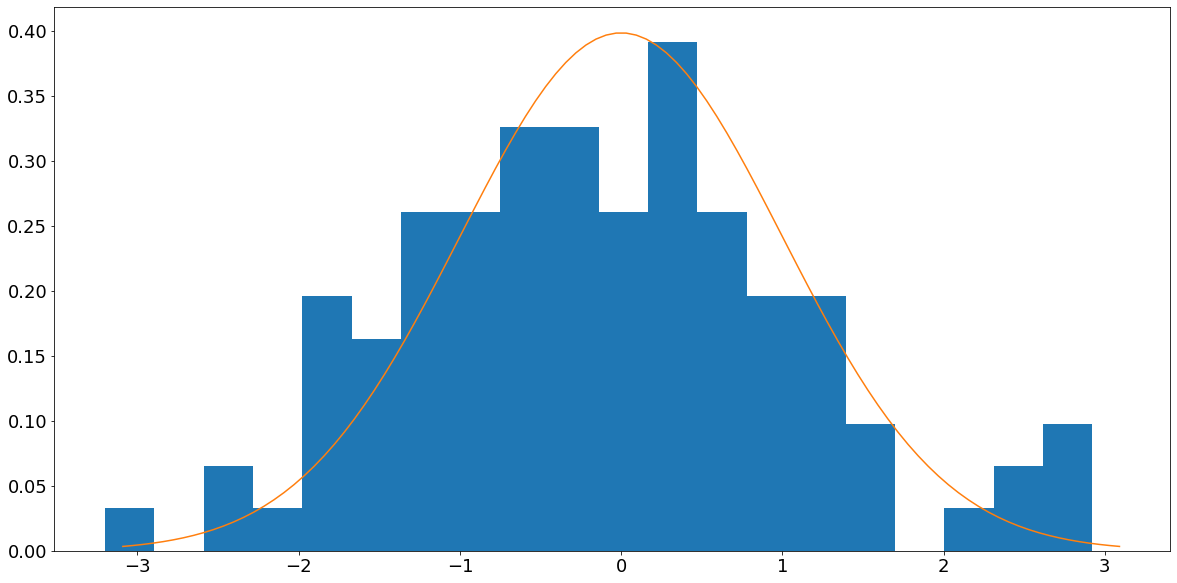

In [4]:
# compute the normalised residuals for the proposed model
z = (y - a*x - b)/sigma

# Plot the histogram
plt.hist(z,bins = 20,density=True)

# Plot the pdf for standard normal distribution
Z = stats.norm()
yy = np.linspace(Z.ppf(0.001),Z.ppf(0.999),100)
plt.plot(yy,Z.pdf(yy))

plt.show()

Looking at this result, you might be more inclined to conclude the model is not suitable. But we still need to 
go further to drawn a firm conclusion. 


## Designing a statistical test

The question underlying **hypothesis testing** is the following: is plausible that the assumed model generated the observed data? If we decide that it is, then the model is accepted, and if not, the model is rejected. Suppose that we design a testing procedure that accepts *all* proposed models. This has the advantage that it will never reject the true model. On the otherhand, we might design a test that rejects all proposed models, and hence 
it will never accept a false model. These extreme cases point to the tension inherent in designing a hypothesis test. We would like to simultaneously minimise the chance of:

- **Type 1 errors**: rejecting the true model,  
- **Type 2 errors**: accepting a false model. 

To quantify the performance of a statistical test a quantity called its **power** can be defined. There
is not time within this course to enter into any of the details. But for many standard problems, tests
are known (and can be looked up) that maximise the power in a suitable sense.  In our case, the appropriate approach is known as the **chi-squared test**.

## Applying the chi-squared test

Within a hypothesis test, we use the data along with the assumed model to compute the value of
a **test statistic**. In this case, it is given by

$
\chi^{2} = \sum_{i=1}^{n} \bar{z}_{i}^{2} =  \sum_{i=1}^{n} \frac{(y_{i}-a x_{i}-b)^{2}}{\sigma^{2}}
$

Assuming that the model is correct, the distribution of the test statistic is known. Below we plot the PDF for $\chi^{2}$ while also showing the value of the test-statistic computed using the data. 


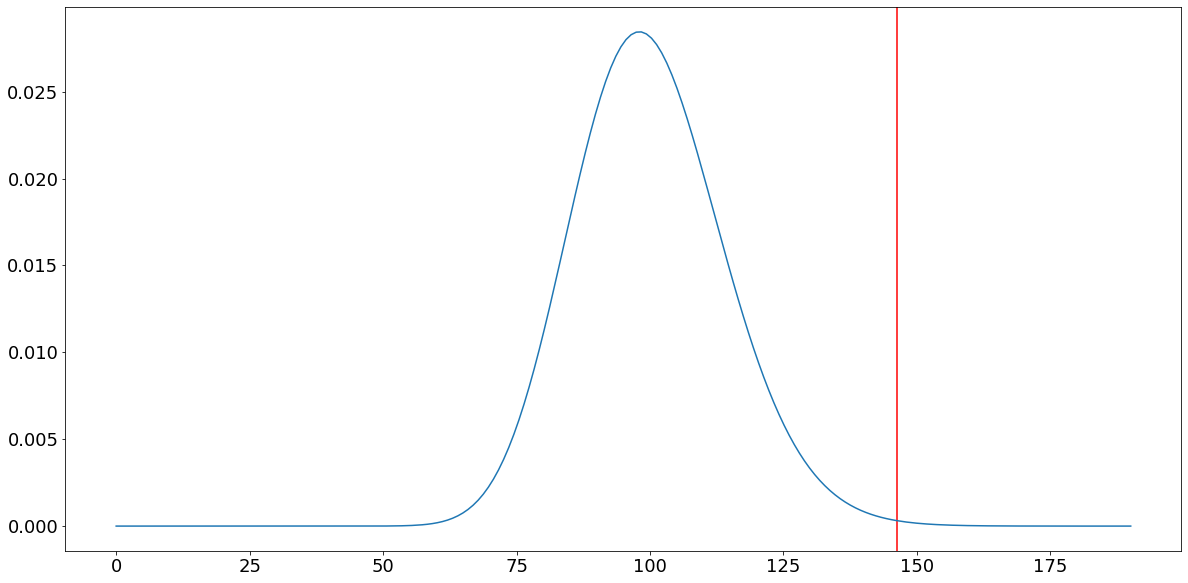

In [5]:
# Compute the value of chi2 from the data
chi2 = np.sum(z*z)
plt.axvline(x = chi2, color = 'r')

# Plot the chi-squared pdf
Chi2 = stats.chi2(n)
xx = np.linspace(0,max(Chi2.ppf(0.999),1.3*chi2), 200)
pp = Chi2.pdf(xx)
plt.plot(xx,pp)
plt.show()

We can see  that the value of $\chi^{2}$ computed from the asssumed model has a  low probability of being sampled from this distribution. This suggests that the model should be rejected. Building on this idea, suppose we agree that there is a value, $\chi_{c}^{2}$ of $\chi^{2}$ that is sufficiently large that 
a  model should be rejected. We can quantify the performance of such a test by computing the probability that it will reject a true model. Using the CDF for the $\chi^{2}$-distribution this is readily done:

$
p = 1 - F_{\chi^{2}}(\chi^{2}_{c})
$

In practice, it is usually more convenient to select a desired value for this probability, $p_{c}$, that then to reject a proposed model if

$
p < p_{c}. 
$

Having set this value, we can proceed as follows.  From the data we compute $\chi^{2}$, and use this to calculate the **p-value**

$
p = 1 - F_{\chi^{2}}(\chi^{2})
$

If this value falls below the $p_{c}$ we then reject the proposed model because it is implausible
 that it could have generated the observed data. 

The p-value for our model is computed below, and at this point we can probaly agree that it is so low that the model should be rejected. 

In [6]:
# Compute the p-value
pv = 1 - Chi2.cdf(chi2)
print("p-value = %7.8f" % pv)

p-value = 0.00179225


## A key point

A common mistake  is to view the $p$-value as the probability that the model is correct. This is entirely false. Within the framwork adopted, a given model either is or is not correct, and this is not a matter of probability. Rather, probabilities quantify the performance of the test under hypothetical repetitions. In any given instance the conclusion drived from the test could be wrong. But this is inhernet to the **frequentist** view of statistics used within this course. 

There does exist a different point of view, that of **Bayesian statistics**, in which probabilistic statements about a model can be made. The Bayesian approach is very interesting, offerring a range of potential advantages
and disadvantages. For those wishing to know more, an accessible review article about frequentist and Bayesian methods can be found at:

https://link.springer.com/chapter/10.1007/978-94-015-8816-4_4